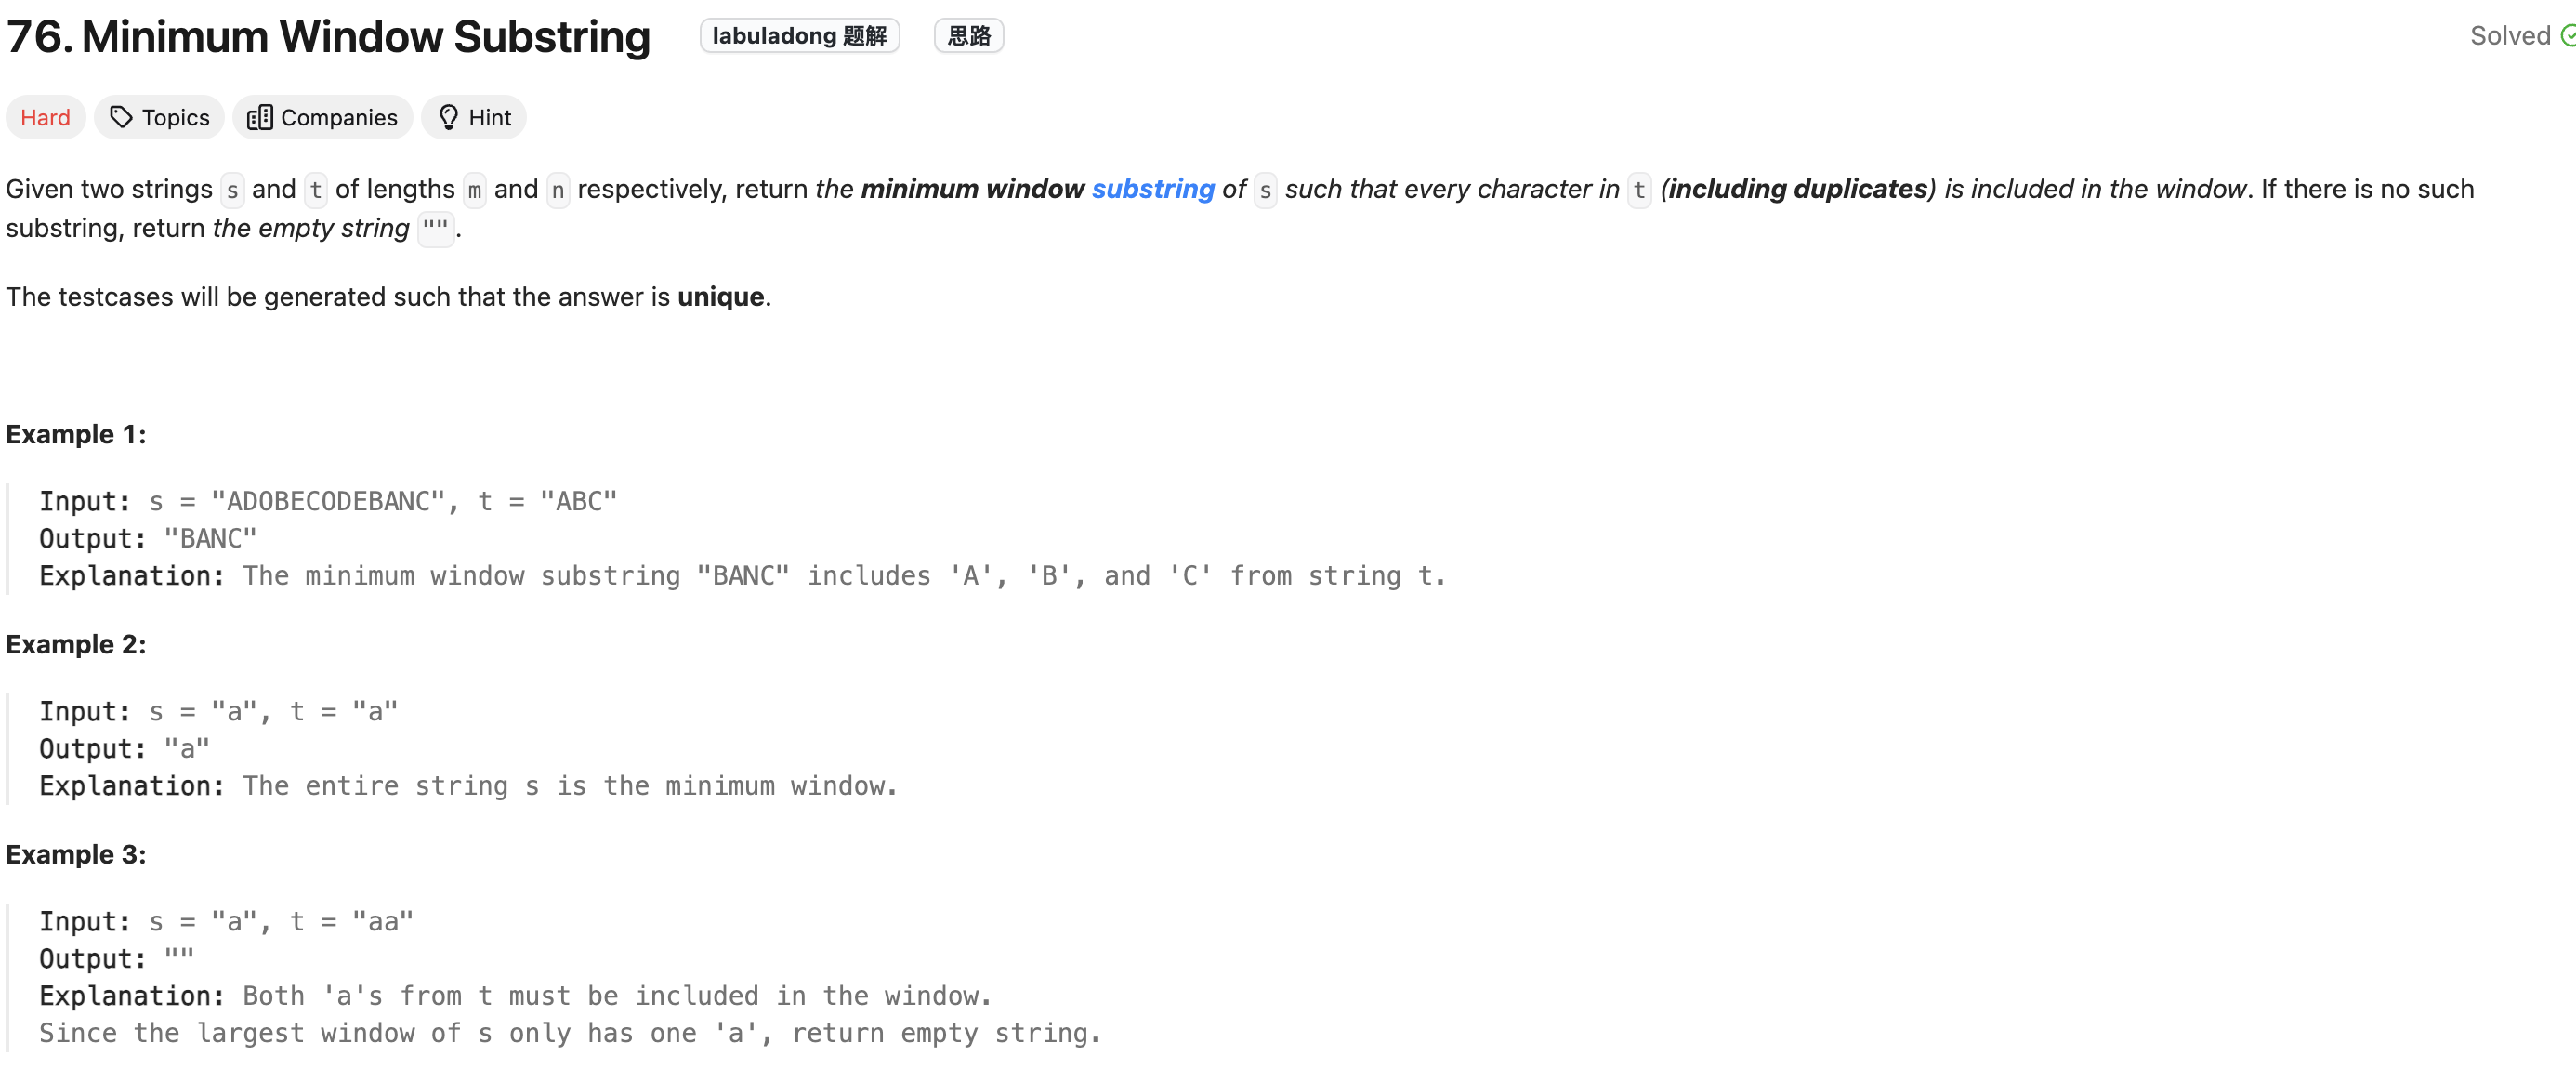

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if len(t) > len(s) or len(s) is None:
            return ""
        
        target = {}
        window = {}
        left = 0
        right = 0 
        valid = 0
        output = ""
        min_length = float('inf')

        #初始化target字典
        for c in t:
            target[c] = target.get(c,0)+1

        while right < len(s):
            c = s[right]
            right +=1
            #假如我们这个地方得到的c是在target里面的，我们应该record并比较他是否match数量
            if c in target:
                window[c] = window.get(c,0)+1
                if window[c] == target[c]:
                    valid += 1
            #收缩sliding window, 当我们当前window不影响数量的时候都可以shrink
            #case1: abc d, d在，abc都可以滚
            #case2: abcd d, d在，但是超过，也可以滚     
            while left < right:
                #判断是否有match，同时如果有match的话要确保shrink的结果是确实减小了size再去update output
                if valid == len(target) and (right-left) < min_length:
                    min_length = min(min_length, right-left)
                    output = s[left:right]
                d = s[left]
                #d 不在target范围，直接挪
                if d not in target:
                    left+=1
                #如果我们d在window的数量已经小于等于target数量，我们挪不了，停止shrink
                elif window[d] <= target[d]:
                    break
                #最后一种情况是: window[d] > target[d], 那就update我们的window,反正删了也没事
                else:
                    window[d] -= 1
                    left += 1
        return output

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if len(t) > len(s) or len(s) is None:
            return ""
        
        target = {}
        window = {}
        left = 0
        right = 0 
        valid = 0
        output = ""
        min_length = float('inf')

        #初始化target字典
        for c in t:
            target[c] = target.get(c,0)+1

        while right < len(s):
            c = s[right]
            right +=1
            #假如我们这个地方得到的c是在target里面的，我们应该record并比较他是否match数量
            if c in target:
                window[c] = window.get(c,0)+1
                if window[c] == target[c]:
                    valid += 1
            #收缩sliding window, 当我们当前window不影响数量的时候都可以shrink
            #case1: abc d, d在，abc都可以滚
            #case2: abcd d, d在，但是超过，也可以滚     
            while valid == len(target):
                #判断是否有match，同时如果有match的话要确保shrink的结果是确实减小了size再去update output
                if right-left < min_length:
                    min_length = right-left
                    output = s[left:right]

                d = s[left]
                left+=1
                #如果我们d在window的数量已经小于等于target数量，我们挪不了，停止shrink
                if d in target:
                    if window[d] == target[d]:
                        valid -= 1
                    window[d] -=1
        return output